<a href="https://colab.research.google.com/github/JohnNuwan/Python_Trading_Repo/blob/master/Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

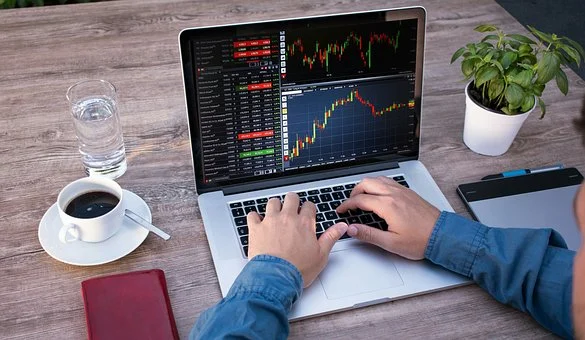

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving EURUSD.csv to EURUSD.csv


In [15]:
import pandas as pd
df = pd.read_csv("EURUSD.csv")
print(df.head())

   Unnamed: 0        time     open  ...  tick_volume  spread  real_volume
0           0  1577934000  1.12182  ...         1116       5            0
1           1  1577937600  1.12208  ...          849       5            0
2           2  1577941200  1.12221  ...          736       5            0
3           3  1577944800  1.12132  ...         1069       5            0
4           4  1577948400  1.12011  ...          776       5            0

[5 rows x 9 columns]


In [16]:
from pyti.smoothed_moving_average import smoothed_moving_average as sma

df['fast_sma'] = sma(df['close'].tolist(), 10)
df['slow_sma'] = sma(df['close'].tolist(), 30)

In [17]:
df.head()

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,fast_sma,slow_sma
0,0,1577934000,1.12182,1.12244,1.12180,1.12209,1116,5,0,1.122090,1.122090
1,1,1577937600,1.12208,1.12244,1.12182,1.12221,849,5,0,1.122153,1.122151
2,2,1577941200,1.12221,1.12230,1.12123,1.12132,736,5,0,1.121846,1.121865
3,3,1577944800,1.12132,1.12142,1.12008,1.12011,1069,5,0,1.121341,1.121403
4,4,1577948400,1.12011,1.12043,1.12008,1.12043,776,5,0,1.121119,1.121195


In [20]:

buy_signals = []

for i in range(1, len(df['close'])):
  if df['slow_sma'][i] > df['low'][i] and (df['slow_sma'][i] - df['low'][i]) > 0.03 * df['low'][i]:
    buy_signals.append([df['time'][i], df['low'][i]])



In [25]:
#def plotData(self, buy_signals = False):
#df = self.df
import plotly.graph_objs as go
from plotly.offline import plot
# plot candlestick chart
candle = go.Candlestick(
  x = df['time'],
  open = df['open'],
  close = df['close'],
  high = df['high'],
  low = df['low'],
  name = "Candlesticks")

# plot MAs
fsma = go.Scatter(
  x = df['time'],
  y = df['fast_sma'],
  name = "Fast SMA",
  line = dict(color = ('rgba(102, 207, 255, 50)')))

ssma = go.Scatter(
  x = df['time'],
  y = df['slow_sma'],
  name = "Slow SMA",
  line = dict(color = ('rgba(255, 207, 102, 50)')))

data = [candle, ssma, fsma]

if buy_signals:
  buys = go.Scatter(
      x = [item[0] for item in buy_signals],
      y = [item[1] for item in buy_signals],
      name = "Buy Signals",
      mode = "markers",
    )

  sells = go.Scatter(
      x = [item[0] for item in buy_signals],
      y = [item[1]*1.02 for item in buy_signals],
      name = "Sell Signals",
      mode = "markers",
    )

  data = [candle, ssma, fsma, buys, sells]


# style and display
layout = go.Layout(title = "EURUSD")
fig = go.Figure(data = data, layout = layout)

plot(fig, filename="eurusd.html")

'eurusd.html'

In [28]:
fig.show()